Text(0, 0.5, 'Demand (QTY)')

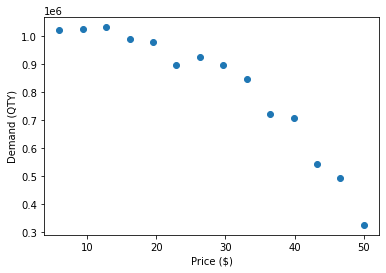

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Input and plot data to understand general trend

x = [6.00, 9.38, 12.77, 16.15, 19.54, 22.92, 26.31, 29.69, 33.08, 36.46, 39.85, 43.23, 46.62, 50.00]
y = [1019878, 1024403, 1030510, 987491, 978686, 896978, 925319, 896294, 844726, 721816, 705903, 545145, 494079, 326932]

plt.scatter(x, y)
plt.xlabel('Price ($)')
plt.ylabel('Demand (QTY)')

# Fit a 2nd Degree Polynomial to the Data

* Fitting a 2nd degree polynomial should provide a nice fit for the data, avoiding overfitting (compared to a 3, 4, or nth deg. polynomial)

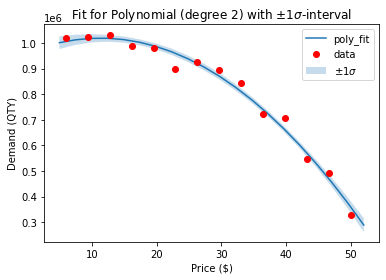

The Coefficients for the nth deg polynomial fit are equal to:  [-4.41487837e+02  1.00162003e+04  9.62026748e+05]
The Coefficients for uncertainty are equal to:  [   52.25950798  2994.17275939 36939.9889676 ]


In [2]:
n = 2  # degree of polynomial
p, cov = np.polyfit(x, y, n, cov=True)  # C_p is estimated covariance matrix
der = np.polyder(p, 1)

# Do the interpolation for plotting:
t = np.linspace(5, 52, 20)
# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
cov_y = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(cov_y))  # Standard deviations are sqrt of diagonal

# Do the plotting:
fg, ax = plt.subplots(1, 1)
ax.set_title("Fit for Polynomial (degree {}) with $\pm1 \sigma$-interval".format(n))
ax.fill_between(t, yi+sig_yi, yi-sig_yi, alpha=.25, label='$\pm1\sigma$')
ax.plot(t, yi,'-', label = 'poly_fit')
ax.plot(x, y, 'ro', label='data')
ax.legend()
ax.set_xlabel('Price ($)')
ax.set_ylabel('Demand (QTY)')

fg.canvas.draw()
plt.show()

print("The Coefficients for the nth deg polynomial fit are equal to: ", p)
# The standard error is the square-root of the diagonal elements
print("The Coefficients for uncertainty are equal to: ", np.sqrt(np.diag(cov)))

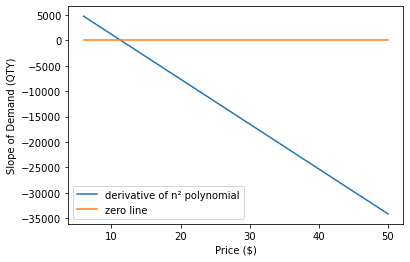

Coeffients of the derivative are:  11.34


In [3]:
fg2, ax2 = plt.subplots(1, 1)
y_der = np.polyval(der,x)

ax2.plot(x, y_der, label='derivative of n\u00b2 polynomial')
ax2.plot(x, [0 for i in range(len(x))], label ='zero line')
ax2.legend()
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Slope of Demand (QTY)')
plt.show()

zero = round(-der[1]/der[0], 2)
print("Coeffients of the derivative are: ", zero)

In [4]:
# Profit = Revenue - Costs, or Profit = (QTY*Price/Widget) - (QTY*Cost/Widget)

profit = []
revenue = []
for i in range(len(x)):
    prof = y[i]*x[i] - y[i]*5
    rev = y[i]*x[i]
    profit.append(prof)
    revenue.append(rev)

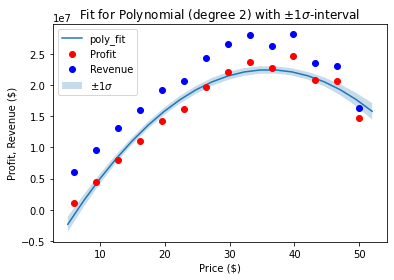

In [5]:
n = 2  # degree of polynomial
p, cov1 = np.polyfit(x, profit, n, cov=True)  # cov is estimated covariance matrix
der2 = np.polyder(p, 1)

# Do the interpolation for plotting:
t = np.linspace(5, 52, 20)

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
cov_y = np.dot(TT, np.dot(cov1, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(cov_y))  # Standard deviations are sqrt of diagonal

# Do the plotting:
fg, ax = plt.subplots(1, 1)
ax.set_title("Fit for Polynomial (degree {}) with $\pm1\sigma$-interval".format(n))
ax.fill_between(t, yi+sig_yi, yi-sig_yi, alpha=.25, label='$\pm1\sigma$')
ax.plot(t, yi,'-', label = 'poly_fit')
ax.plot(x, profit, 'ro', label='Profit')
ax.plot(x, revenue,'bo', label = 'Revenue')
ax.legend()
ax.set_xlabel('Price ($)')
ax.set_ylabel('Profit, Revenue ($)')


fg.canvas.draw()
plt.show()

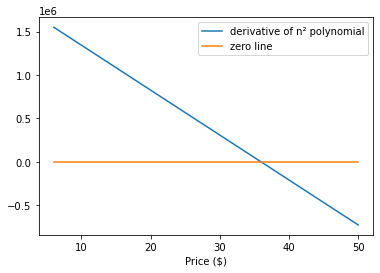

Coeffients of the derivative are:  [ -51755.74372998 1860312.20813647]


In [6]:
fg3, ax3 = plt.subplots(1, 1)
y_der2 = np.polyval(der2, x)

ax3.plot(x,y_der2, label='derivative of n\u00b2 polynomial')
ax3.plot(x, [1 for i in range(len(x))], label='zero line')
ax3.legend()
ax3.set_xlabel('Price ($)')

plt.show()
print("Coeffients of the derivative are: ", der2)

In [7]:
# Price is elastic when slope of the fitted curve is greater than one, or between the prices from $0 to $35.94 
# and inelastic for values of the slope less than one, or when prices greater than $35.94

zero2 = round(-der2[1]/der2[0],2)
print("Derivative is equal to zero at: ", zero2)

Derivative is equal to zero at:  35.94


In [8]:
# Find where elasticity is unitary, or the slope of the fitted curve is equal to 1. Setting the derivative of the
# polynomial fit equal to 1 and solving yields $35.94. 

one = round(-(der2[1]-1)/der2[0], 2)
print("Derivative is equal to one at: ", one)

Derivative is equal to one at:  35.94
